## 2022 SAT SCORE DISTRIBUTION BY STATE

In [152]:
import pandas as pd
import geopandas as gpd
import folium 
from folium import plugins
from folium.plugins import StripePattern
import numpy as np

First, get Folium's shape files, which supplies mappable state locations:

In [153]:
state_geo = ("https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/us-states.json")
geoJSON_df = gpd.read_file(state_geo)
geoJSON_df.head()

id        name                                           geometry
0  AL     Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...
1  AK      Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  AZ     Arizona  POLYGON ((-109.04250 37.00026, -109.04798 31.3...
3  AR    Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  CA  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...

Now we'll merge the shapes with some columns of SAT data to get everything into one dataframe:

In [154]:
geoJSON_df=geoJSON_df.rename(columns = {"id":"stateabbr"})
state_scores = "https://raw.githubusercontent.com/NickKrausStack/SATdata/main/States.csv"
df = pd.read_csv(state_scores)
df = df[["stateabbr","TotalMean","Participation"]]
final_df = geoJSON_df.merge(df, on = "stateabbr")
final_df.head()

stateabbr        name                                           geometry  \
0        AL     Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...   
1        AK      Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...   
2        AZ     Arizona  POLYGON ((-109.04250 37.00026, -109.04798 31.3...   
3        AR    Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...   
4        CA  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...   

   TotalMean  Participation  
0       1146           0.04  
1       1110           0.26  
2       1159           0.14  
3       1191           0.02  
4       1115           0.21

And now we are ready to leverage Folium to produce a choropleth graph, which will provide an interactive account of averages by state.

In [155]:
m = folium.Map(location=[50, -102], zoom_start=2.5, tiles="openstreet map")

folium.Choropleth(
    geo_data=final_df,
    data=final_df,
    columns=["stateabbr", "TotalMean"],
    key_on="feature.properties.stateabbr",
    fill_color="RdYlGn",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="SAT Scores",
).add_to(m)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = final_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name','TotalMean'],
        aliases=['name','TotalMean'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
m.add_child(NIL)
m.keep_in_front(NIL)

m

Similar code to create the choropleth graph comparing participation by state:

In [156]:
m = folium.Map(location=[50, -102], zoom_start=2.5, tiles="openstreet map")

folium.Choropleth(
    geo_data=final_df,
    data=final_df,
    columns=["stateabbr", "Participation"],
    key_on="feature.properties.stateabbr",
    fill_color="RdYlGn",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="SAT Participation Rate",
).add_to(m)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.20, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = final_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name','Participation'],
        aliases=['name','Participation'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
m.add_child(NIL)
m.keep_in_front(NIL)

m

Use Pandas functionality to calculate separate averages for the cluster states and the rest of the states:

In [151]:
midweststates = ['Montana', 'Wyoming', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Utah', 'Minnesota', 'Wisconsin', 'Missouri', 'Kentucky', 'Tennessee', 'Mississippi']
midwestdf = final_df[final_df['name'].isin(midweststates)]
nomidwestdf = final_df[~final_df['name'].isin(midwest)]
print('avg participation, cluster states: ', midwestdf['Participation'].mean())
print('avg participation, non cluster states: ', nomidwestdf['Participation'].mean())

avg participation, cluster states:  0.06615384615384617
avg participation, non cluster states:  0.4848648648648649


Now we produce the meanscore/participation line graph using matplotlib.

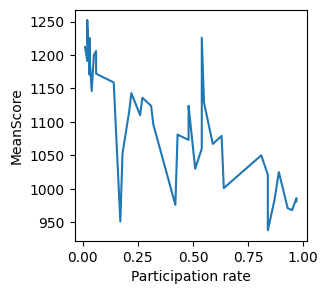

In [141]:
import matplotlib.pyplot as plt
plt.plot(df['Participation'], df['TotalMean'])
plt.xlabel('Participation rate')
plt.ylabel('MeanScore')
plt.rcParams['figure.figsize'] = [3,3]
plt.show()